# Med multigrid

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from matplotlib2tikz import save as tikz_save
L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 64
# The grid spacing is L/n
gridlevel = 16
# The number of iterations
counter = 0
nsteps = 15
realval = 10
percentageMargin = 0.99
percentLower = 0.9
# Initialize the grid to 0
v = np.zeros((n+1, n+1))
oldV = v
vnew = np.zeros((n+1, n+1))

# Set the boundary conditions
for i in range(0,n):
    v[0,i] = 10
    v[n,i] = 10
    v[i,0] = 10
    v[i,n] = 10
    v[n, n] = 10
"""
for i in range(1,n):
    for j in range(1,n):
        v[i, j] = 0.9*realval
"""
#1.2

#oldV = v
#print(v)


#v[int(n/2), int(n/2)] = 4

initval = v[int(n/2), int(n/2)]
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
midval = []
steps = []
# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 2

# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        # for x in range(1,n):
        #     for y in range(1,n):
        ##        if (x*(n+1) + y) % checker == check:
        ##            v[x,y] = vnew[x,y]
steps.append(0)
midval.append(v[int(n/2), int(n/2)])




def distribute(n, v, level):
    for x in range(level,n):
        for y in range(level,n+1-level):
            if x % level == 0 and y % level == 0:
                pass
            elif x % level == level//2 and y % level == level//2:
                v[x, y] = 1/4*(v[x+level//2, y + level//2] + v[x-level//2, y + level//2] + v[x+level//2, y - level//2] + v[x-level//2, y - level//2])
            elif x % level == level//2 and y % level != level//2:
                v[x, y] = 1/2*(v[x+level//2, y] + v[x-level//2, y])
            elif x % level != level//2 and y % level == level//2:
                v[x, y] = 1/2*(v[x, y+level//2] + v[x, y-level//2])

    #print('högerled')
    #print(v[level//2:n:level, level//2:n:level])
    #print('vänsterled')
    #print((v[level:n:level, 0:n-level:level] + v[0:n-level:level, 0:n-level:level] + v[level:n:level, level:n:level] + v[0:n-level:level, level:n:level])*1/4
#)
    """
    coolmatrix = (v[level:n:level, 0:n-level:level] + v[0:n-level:level, 0:n-level:level] + v[level:n:level, level:n:level] + v[0:n-level:level, level:n:level]).copy()
    coolmatrix = 1/4*coolmatrix
    v[level//2:n:level, level//2:n:level] = coolmatrix
    """







def multigrid(step):
    global n, v, checker, counter, steps, midval, gridlevel
    steps.append(step)
    midval.append(v[int(n/2), int(n/2)])
    for i in range(0, gridlevel):
        vRough = v[::(2**i), ::(2**i)].copy()

        relax(n//(2**i),vRough, checker)
        v[::(2**i), ::(2**i)] = vRough

    for i in range(gridlevel-1, 0, -1):
        level = 2**i
        #print('dgår')
        #print(v)
        distribute(n, v, level)




    counter += 1
    steps.append(counter)
    midval.append(v[int(n/2), int(n/2)])

    okvals = 0
    for x in range(1,n):
        for y in range(1,n):

            if v[x, y] >= realval*percentageMargin:
                okvals += 1
    #print(v[int(n/2), int(n/2)])
    #print(step/nsteps)

    

    im.set_array(v)
    return im,



def update(step):
    global n, v, checker, counter, steps, midval
    steps.append(step)
    midval.append(v[int(n/2), int(n/2)])
    relax(n, v, checker)
    counter += 1
    steps.append(counter)
    midval.append(v[int(n/2), int(n/2)])
    okvals = 0
    for x in range(1,n):
        for y in range(1,n):

            if v[x, y] >= realval*percentageMargin:
                okvals += 1
    #print(v[int(n/2), int(n/2)])
    #print(step/nsteps)

    
        
    im.set_array(v)
    return im,

anim = animation.FuncAnimation(fig, multigrid, frames=nsteps, interval=200, blit=True, repeat=False)
"""
for i in range(200):
    update(i, oldV)

compareV = v.copy()
print(compareV)
for i in range(1,n):
    for j in range(1,n):
        v[i, j] = 0.9*v[i, j]

#1.2
counter = 0
print(compareV)
#print(v)

"""
"""
np.zeros((n+1, n+1))
for i in range(1,n):
    v[0,i] = 0
    v[n,i] = 10
    v[i,0] = 10
    v[i,n] = 10
print(v)
counter = 0
print()
print()
print()
print()
print()
"""
"""
for i in range(110):
    print()
    update(i, compareV)


"""
"""
fig2=plt.figure()
ax2 = fig2.add_subplot(111)
ax2.grid()
#sns.set()
ax2.plot(steps, midval, '-o', ms = 2)
ax2.plot(steps, 10*np.ones(len(steps)), '-.', ms = 2, label = 'Real value (4)')
plt.xlabel('Iterations')
plt.ylabel('Middle element value')
plt.legend(loc = 'best')
plt.title('Middle element value as a function of #iterations, initial value '+str(initval))
tikz_save('plot100.tex')
"""
#tikz_save('plot100.tex')
from IPython.display import HTML

#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())


# Utan multigrid:

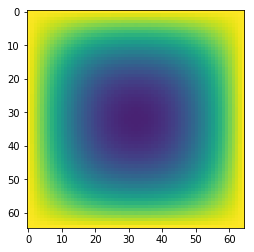

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from matplotlib2tikz import save as tikz_save
L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 64
# The grid spacing is L/n
gridlevel = 16
# The number of iterations
counter = 0
nsteps = 200
realval = 10
percentageMargin = 0.99
percentLower = 0.9
# Initialize the grid to 0
v = np.zeros((n+1, n+1))
oldV = v
vnew = np.zeros((n+1, n+1))

# Set the boundary conditions
for i in range(0,n):
    v[0,i] = 10
    v[n,i] = 10
    v[i,0] = 10
    v[i,n] = 10
    v[n, n] = 10
"""
for i in range(1,n):
    for j in range(1,n):
        v[i, j] = 0.9*realval
"""
#1.2

#oldV = v
#print(v)


#v[int(n/2), int(n/2)] = 4

initval = v[int(n/2), int(n/2)]
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
midval = []
steps = []
# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 2

# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        # for x in range(1,n):
        #     for y in range(1,n):
        ##        if (x*(n+1) + y) % checker == check:
        ##            v[x,y] = vnew[x,y]
steps.append(0)
midval.append(v[int(n/2), int(n/2)])




def distribute(n, v, level):
    for x in range(level,n):
        for y in range(level,n+1-level):
            if x % level == 0 and y % level == 0:
                pass
            elif x % level == level//2 and y % level == level//2:
                v[x, y] = 1/4*(v[x+level//2, y + level//2] + v[x-level//2, y + level//2] + v[x+level//2, y - level//2] + v[x-level//2, y - level//2])
            elif x % level == level//2 and y % level != level//2:
                v[x, y] = 1/2*(v[x+level//2, y] + v[x-level//2, y])
            elif x % level != level//2 and y % level == level//2:
                v[x, y] = 1/2*(v[x, y+level//2] + v[x, y-level//2])

    #print('högerled')
    #print(v[level//2:n:level, level//2:n:level])
    #print('vänsterled')
    #print((v[level:n:level, 0:n-level:level] + v[0:n-level:level, 0:n-level:level] + v[level:n:level, level:n:level] + v[0:n-level:level, level:n:level])*1/4
#)
    """
    coolmatrix = (v[level:n:level, 0:n-level:level] + v[0:n-level:level, 0:n-level:level] + v[level:n:level, level:n:level] + v[0:n-level:level, level:n:level]).copy()
    coolmatrix = 1/4*coolmatrix
    v[level//2:n:level, level//2:n:level] = coolmatrix
    """







def multigrid(step):
    global n, v, checker, counter, steps, midval, gridlevel
    steps.append(step)
    midval.append(v[int(n/2), int(n/2)])
    for i in range(0, gridlevel):
        vRough = v[::(2**i), ::(2**i)].copy()

        relax(n//(2**i),vRough, checker)
        v[::(2**i), ::(2**i)] = vRough

    for i in range(gridlevel-1, 0, -1):
        level = 2**i
        #print('dgår')
        #print(v)
        distribute(n, v, level)




    counter += 1
    steps.append(counter)
    midval.append(v[int(n/2), int(n/2)])

    okvals = 0
    for x in range(1,n):
        for y in range(1,n):

            if v[x, y] >= realval*percentageMargin:
                okvals += 1
    #print(v[int(n/2), int(n/2)])
    print(step/nsteps)

    if okvals == (n-1)**2:
        print('KLART')
        print(counter)

    im.set_array(v)
    return im,



def update(step):
    global n, v, checker, counter, steps, midval
    steps.append(step)
    midval.append(v[int(n/2), int(n/2)])
    relax(n, v, checker)
    counter += 1
    steps.append(counter)
    midval.append(v[int(n/2), int(n/2)])
    okvals = 0
    for x in range(1,n):
        for y in range(1,n):

            if v[x, y] >= realval*percentageMargin:
                okvals += 1
    #print(v[int(n/2), int(n/2)])
    #print(step/nsteps)

    #if okvals == (n-1)**2:
        #print('KLART')
        #print(counter)
    im.set_array(v)
    return im,

anim = animation.FuncAnimation(fig, update, frames=nsteps, interval=200, blit=True, repeat=False)
"""
for i in range(200):
    update(i, oldV)

compareV = v.copy()
print(compareV)
for i in range(1,n):
    for j in range(1,n):
        v[i, j] = 0.9*v[i, j]

#1.2
counter = 0
print(compareV)
#print(v)

"""
"""
np.zeros((n+1, n+1))
for i in range(1,n):
    v[0,i] = 0
    v[n,i] = 10
    v[i,0] = 10
    v[i,n] = 10
print(v)
counter = 0
print()
print()
print()
print()
print()
"""
"""
for i in range(110):
    print()
    update(i, compareV)


"""
"""
fig2=plt.figure()
ax2 = fig2.add_subplot(111)
ax2.grid()
#sns.set()
ax2.plot(steps, midval, '-o', ms = 2)
ax2.plot(steps, 10*np.ones(len(steps)), '-.', ms = 2, label = 'Real value (4)')
plt.xlabel('Iterations')
plt.ylabel('Middle element value')
plt.legend(loc = 'best')
plt.title('Middle element value as a function of #iterations, initial value '+str(initval))
tikz_save('plot100.tex')
"""
#tikz_save('plot100.tex')
from IPython.display import HTML

#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())
